# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: If I were working for Motivate, I could be want to know these: 

1- Who are the users that had the long trip duration?
2- Which station receives the most number of users?

If I were using the services for Motivate, I could be  want to know these:

1- What are the places that stations in?
2- What are the types of users and trips duration?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [11]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [14]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = trip_reader.__next__()
            
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [15]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    if city == 'Washington':
        # Washington has the time duration in milliseconds
        # convert millisecond to Minutes by dividing with 60,000
        # print(type(datum))
        # print(datum)
        # print(datum['Duration (ms)'])
        duration = (float(datum['Duration (ms)'])/60000)
    elif city == 'Chicago' or city == 'NYC':
        # Chicago and NYC has the time in seconds
        # convert seconds to minutes by dividing with 60
        # print(datum['tripduration'])
        duration = (float(datum['tripduration'])/60)
    else:
        print('Invalid City')
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [16]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # strptime(...) is String Parse Time
    # strftime(...) is String Format Time
    
    # Converted 'month' and 'hour' to Integers to remove leading Zero's.
    
    if city == 'Washington':
        # Washington has 'Start date' as '3/31/2016 22:57'
        # and 'End date' as '3/31/2016 23:04'
        # print(datum['Start date'])
        month = int(datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%m'))
        hour = int(datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%H'))
        day_of_week = datetime.strptime(datum['Start date'],"%m/%d/%Y %H:%M").strftime('%A')
    elif city == 'Chicago':
        # Chicago has 'starttime' as '3/31/2016 23:30')
        # and 'stoptime' as '3/31/2016 23:46'
        # print(datum['starttime'])
        month = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%m'))
        hour = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%H'))
        day_of_week = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M").strftime('%A')
    elif city == 'NYC':
        # NYC has 'starttime' as '1/1/2016 00:09:55')
        # and 'stoptime' as '1/1/2016 00:23:54'
        #print(datum['starttime'])
        month = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%m'))
        hour = int(datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%H'))
        day_of_week = datetime.strptime(datum['starttime'],"%m/%d/%Y %H:%M:%S").strftime('%A')
    else:
        print('Invalid City')
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [17]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # Washington has different category names 
    # change names to reflect the categories in NYC and Chicago.
    if city == 'Washington':
        if datum['Member Type'] == 'Registered':
            datum['Member Type'] = 'Subscriber'
        elif datum['Member Type'] == 'Casual':
            datum['Member Type'] = 'Customer'
        else:
            print("Invalid Member Type for Washington")
        
        user_type = datum['Member Type']
    elif city == 'Chicago' or city == 'NYC':
        user_type = datum['usertype']
    else:
        Print("Invalid City")
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [18]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'], new_point['hour'], new_point['day_of_week'] = time_of_trip(row, city)
            new_point['user_type'] = type_of_user(row, city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [19]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers? 

**Answer**: 1- Which city has the highest number of trips? It's NYC

2- Which city has the highest proportion of trips made by subscribers? It's NYC

3- Which city has the highest proportion of trips made by short-term customers? It's Chicago

In [20]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [21]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file_Washington = './data/Washington-2016-Summary.csv'
data_file_Chicago = './data/Chicago-2016-Summary.csv'
data_file_NYC = './data/NYC-2016-Summary.csv'
print(number_of_trips(data_file_Washington))
print(number_of_trips(data_file_Chicago))
print(number_of_trips(data_file_NYC))

(51753, 14573, 66326)
(54982, 17149, 72131)
(245896, 30902, 276798)


In [22]:
# Create a Dict to store the user count for each city based on the user type
trips_data = {'Washington': {'Subscribers':0, 'Customers':0, 'Total':0},
             'Chicago': {'Subscribers':0, 'Customers':0, 'Total':0},
             'NYC': {'Subscribers':0, 'Customers':0, 'Total':0}}

# Populate the Dict using the data from each of the three csv files.
trips_data['Washington'] = dict(zip(trips_data['Washington'].keys(), number_of_trips(data_file_Washington)))
trips_data['Chicago'] = dict(zip(trips_data['Chicago'].keys(), number_of_trips(data_file_Chicago)))
trips_data['NYC'] = dict(zip(trips_data['NYC'].keys(), number_of_trips(data_file_NYC)))

# Dict to map each of the cities
cities_dict = {1:'Washington' , 2:'Chicago' , 3:'NYC' }
print(cities_dict)

# Store the total trips detail for each city
total_trips_dict = {1:trips_data['Washington']['Total'],
                    2:trips_data['Chicago']['Total'],
                    3:trips_data['NYC']['Total']}

# Find the city with highest number of trips
city_high_trips = max(total_trips_dict, key=total_trips_dict.get)
print("\nWhich city has the highest number of trips?" + " >>> It's " + cities_dict[city_high_trips])
print(total_trips_dict)


# Find the proportion of trips made by Subscribers
subs_prop_dict = {1: trips_data['Washington']['Subscribers']/trips_data['Washington']['Total'],
                  2: trips_data['Chicago']['Subscribers']/trips_data['Chicago']['Total'],
                  3: trips_data['NYC']['Subscribers']/trips_data['NYC']['Total']}

# Find the city with highest proportion of trips by Subscribers
city_high_prob_subs = max(subs_prop_dict, key=subs_prop_dict.get)
print("\nWhich city has the highest proportion of trips made by subscribers?" + " >>> It's " + cities_dict[city_high_prob_subs])
print(subs_prop_dict)


# Find the proportion of trips made by Customers
cust_prop_dict = {1: trips_data['Washington']['Customers']/trips_data['Washington']['Total'], 
                  2: trips_data['Chicago']['Customers']/trips_data['Chicago']['Total'], 
                  3: trips_data['NYC']['Customers']/trips_data['NYC']['Total']}

# Find the city with highest proportion of trips by Customers
city_high_prob_cust = max(cust_prop_dict, key=cust_prop_dict.get)
print("\nWhich city has the highest proportion of trips made by short-term customers?" + " >>> It's " + cities_dict[city_high_prob_cust])
print(cust_prop_dict)

{1: 'Washington', 2: 'Chicago', 3: 'NYC'}

Which city has the highest number of trips? >>> It's NYC
{1: 66326, 2: 72131, 3: 276798}

Which city has the highest proportion of trips made by subscribers? >>> It's NYC
{1: 0.7802822422579381, 2: 0.7622520136973008, 3: 0.8883590199351151}

Which city has the highest proportion of trips made by short-term customers? >>> It's Chicago
{1: 0.21971775774206193, 2: 0.23774798630269925, 3: 0.11164098006488486}


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: What is the average trip length for each city?

1-Average Trip Length of Washington = 18 Minutes

2-Average Trip Length of Chicago = 16 Minutes

3-Average Trip Length of NYC = 15 Minutes



What proportion of rides made in each city are longer than 30 minutes?

1-Percentage Trips Longer Than 30 Minutes in Washington = 10.84%

2-Percentage Trips Longer Than 30 Minutes in Chicago = 8.33%

3-Percentage Trips Longer Than 30 Minutes in NYC = 7.3%

In [23]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##



In [24]:
# Total trips for each city
total_trips_washington = total_trips_dict[1]
total_trips_chicago = total_trips_dict[2]
total_trips_nyc = total_trips_dict[3]

In [25]:
def avg_trip_length(filename, city):
    '''
        Get the average trip length based on the city filename
    '''
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initialize the variables
        total_trip_length = 0
        
        # Get the total trip length
        for row in reader:
            total_trip_length = total_trip_length + float(row['duration'])
        
        # Get total number of rides for each city
        if city == 'Washington':
            total_trips = total_trips_washington
        elif city == 'Chicago':
            total_trips = total_trips_chicago
        else:
            total_trips = total_trips_nyc
        
        # return average trip length in minutes(rounded)
        return(int(total_trip_length/total_trips))
    
# Get Average Trip Length for each City
avg_trip_length_washington = avg_trip_length(data_file_Washington, 'Washington')
avg_trip_length_chicago = avg_trip_length(data_file_Chicago, 'Chicago')
avg_trip_length_nyc = avg_trip_length(data_file_NYC, 'NYC')

# Print Average Trip Length for each City
print("\n*** Average Trip Length for each City ***\n")
print("Average Trip Length of Washington" + " = " + str(avg_trip_length_washington) + " Minutes")
print("Average Trip Length of Chicago" + " = " + str(avg_trip_length_chicago) + " Minutes")
print("Average Trip Length of NYC" + " = " + str(avg_trip_length_nyc) + " Minutes")


*** Average Trip Length for each City ***

Average Trip Length of Washington = 18 Minutes
Average Trip Length of Chicago = 16 Minutes
Average Trip Length of NYC = 15 Minutes


In [26]:
def longer_trip_percent(filename, city):
    '''
        Get percent of trips that are longer than 30 minutes
    '''
    TRIP_DURATION = 30.0
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initialize the variables
        longer_trip_count = 0
        
        # Get the no of trips longer than 30 Minutes
        for row in reader:
            if float(row['duration']) > TRIP_DURATION:
                longer_trip_count += 1
        
        # Get total number of rides for each city
        if city == 'Washington':
            total_trips = total_trips_washington
        elif city == 'Chicago':
            total_trips = total_trips_chicago
        else:
            total_trips = total_trips_nyc
            
        # return % of trips that are longer than 30 minutes(rounded to 2 decimal places)
        return((round(longer_trip_count/total_trips, 4) * 100))

# Get percentage of trips that are longer than 30 minutes for each city
long_trip_per_washington = longer_trip_percent(data_file_Washington, 'Washington')
long_trip_per_chicago = longer_trip_percent(data_file_Chicago, 'Chicago')
long_trip_per_nyc = longer_trip_percent(data_file_NYC, 'NYC')

# Print percentage of trips that are longer than 30 minutes for each city
print("\n*** Percentage of trips that are longer than 30 minutes ***\n")
print("Percentage Trips Longer Than 30 Minutes in Washington" + " = " + str(long_trip_per_washington) + "%")
print("Percentage Trips Longer Than 30 Minutes in Chicago" + " = " + str(long_trip_per_chicago) + "%")
print("Percentage Trips Longer Than 30 Minutes in NYC" + " = " + str(long_trip_per_nyc) + "%")


*** Percentage of trips that are longer than 30 minutes ***

Percentage Trips Longer Than 30 Minutes in Washington = 10.84%
Percentage Trips Longer Than 30 Minutes in Chicago = 8.33%
Percentage Trips Longer Than 30 Minutes in NYC = 7.3%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: I choose Washington city.

1- The average trip length for Subscribers or Customers in Washington:

Subscribers Avg Duration = 12.53; Customers Avg Duration = 41.68



2- The type of user takes longer rides on average: Subscribers or Customers in Washington:

In Washington Customers take longer rides than Subscribers

In [27]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##



In [28]:
def rides_user_type(filename, city):
    '''
        Get the rides based on user type - Subscribers and Customers
    '''
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        trip_length_subscribers = 0
        trip_count_subscribers = 0
        
        trip_length_customers = 0
        trip_count_customers = 0
        
        # Get the trip length and trip counts for Subscribers and
        # Customers in each city.
        for row in reader:
            if city == 'Washington':
                if row['user_type'] == 'Subscriber':
                    trip_length_subscribers += float(row['duration'])
                    trip_count_subscribers += 1
                else:
                    trip_length_customers += float(row['duration'])
                    trip_count_customers += 1
              
       # return average trip duration for Subscribers and Customers
        avg_trip_len_subscriber = round((trip_length_subscribers/trip_count_subscribers), 2)
        avg_trip_len_customer = round((trip_length_customers/trip_count_customers), 2)
        return(avg_trip_len_subscriber, avg_trip_len_customer)

# Get the average trip length for Subscribers and Customers in each city.     
avg_trip_len_subs_washington, avg_trip_len_cust_washington = rides_user_type(data_file_Washington, 'Washington')

# Print the average trip length for Subscribers and Customers in each city.
print("\n1- The average trip length for Subscribers or Customers in Washington:\n")
print("Subscribers Avg Duration = " + str(avg_trip_len_subs_washington) + "; Customers Avg Duration = " + str (avg_trip_len_cust_washington))

print("\n2- The type of user takes longer rides on average: Subscribers or Customers in Washington:\n")

# Print the user type - Subscribers or Customers who take longer rides each city.
if (avg_trip_len_subs_washington > avg_trip_len_cust_washington):
    print ("In Washington Subscribers take longer rides than Customers")
else:
    print ("In Washington Customers take longer rides than Subscribers")
    


1- The average trip length for Subscribers or Customers in Washington:

Subscribers Avg Duration = 12.53; Customers Avg Duration = 41.68

2- The type of user takes longer rides on average: Subscribers or Customers in Washington:

In Washington Customers take longer rides than Subscribers


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

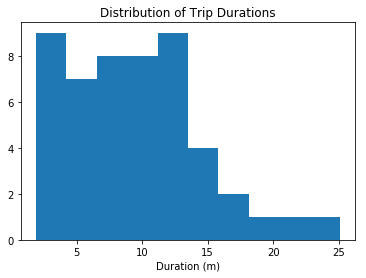

In [29]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [30]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##



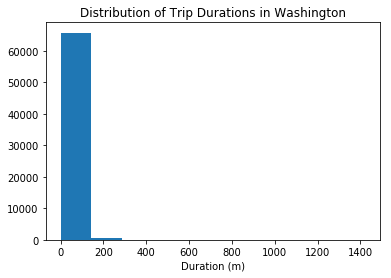

In [31]:
## Collect all of the trip times and use pyplot to generate a histogram of trip times.
def trip_times(filename, city):
    '''
        Get the trip times for each of the cities.
    '''
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        trip_times_washington = []
        
        # Create the trip time list for each city
        for row in reader:
            if city == 'Washington':
                trip_times_washington.append(float(row['duration']))
              
        # return the trip time list for each city
        if city == 'Washington':
            return trip_times_washington

# Get the trip time list for each city
trip_times_washington = trip_times(data_file_Washington, 'Washington')

# Plot the histogram of trip durations for each city
plt.hist(trip_times_washington)
plt.title('Distribution of Trip Durations in Washington')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 1- Where is the peak of each distribution, for each group?

The peak is approximately at the Average Trip Duration (Mean).



2- How would you describe the shape of each distribution?

Both distributions are skewed to the right.

In [32]:
## Use this and additional cells to answer Question 5. ##

In [33]:
def trip_times_subs_cust(filename, city):
    '''
        Get the trip times for each of the cities.
    '''
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        trip_times_subs_washington = []
        trip_times_cust_washington = []
        
        # Get the trip times for Subscribers and Customers for each city
        for row in reader:
            if city == 'Washington':
                if row['user_type'] == 'Subscriber':
                    trip_times_subs_washington.append(float(row['duration']))
                else:
                    trip_times_cust_washington.append(float(row['duration']))
              
        # return trip duration of Subscribers and Customers for each city
        if city == 'Washington':
            return (trip_times_subs_washington, trip_times_cust_washington)

# Get trip duration of Subscribers and Customers for each city
trip_times_subs_washington, trip_times_cust_washington = trip_times_subs_cust(data_file_Washington, 'Washington')

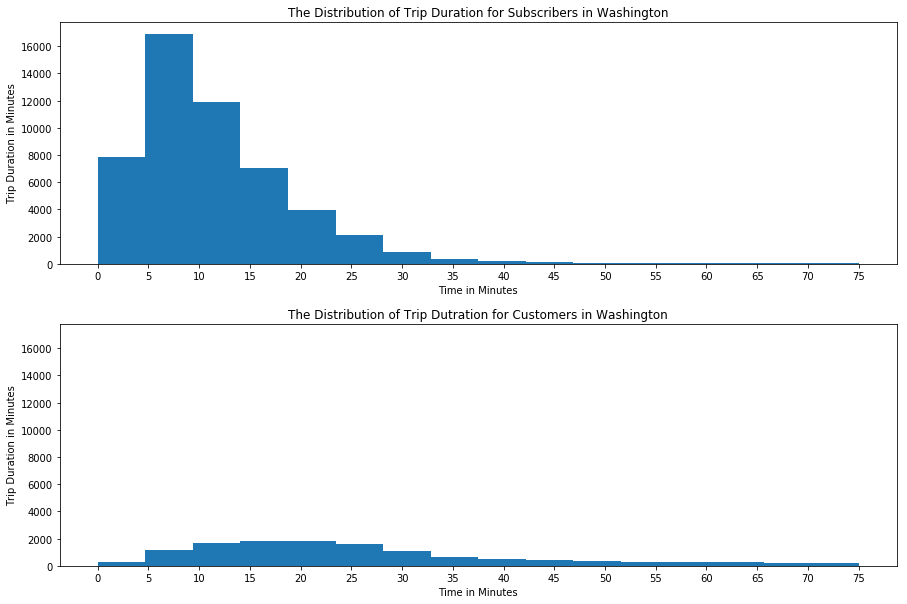

In [34]:
import matplotlib.ticker
# Plot the histogram of trip durations for Washington users
f, (plt1, plt2) = plt.subplots(2, sharey=True)
plt1.hist(trip_times_subs_washington, range = (0, 75), bins = 16)
plt1.set_title('The Distribution of Trip Duration for Subscribers in Washington')
plt1.set_xlabel('Time in Minutes')
plt1.set_ylabel("Trip Duration in Minutes")
plt1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))

plt2.hist(trip_times_cust_washington, range = (0, 75), bins = 16)
plt2.set_title('The Distribution of Trip Dutration for Customers in Washington')
plt2.set_xlabel('Time in Minutes')
plt2.set_ylabel("Trip Duration in Minutes")
plt2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: 1- How does ridership differ in Washington by month or season? Which month/season has the highest ridership?>>> The ridership in Washington was increasing from the first month until the seventh month, then started to decrease. The highest ridership was in the seventh month (July). 


2- Does the ratio of Subscriber trips to Customer trips change depending on the month or season?>>> Yes, it does. The highest ratio was in the first month and the second month (January and February).


3- Is the pattern of ridership different on the weekends versus weekdays?>>> Yes, it is. The average duration trips in weekdays are higher than at weekends.


4- On what days are Subscribers most likely to use the system?>>> They are Wednesday and Thursday (weekdays).


5- What about Customers?>>> On Saturday and Sunday (weekends).


In [35]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

Ridership by Month for Washington => {1: 31140.223600000107, 2: 36565.14208333328, 3: 110075.18485000047, 4: 109825.68944999986, 5: 116117.24186666649, 6: 153950.80770000006, 7: 168083.57223333383, 8: 134724.9150000009, 9: 131644.45458333314, 10: 125110.32186666655, 11: 89993.60525000017, 12: 48510.61320000002}


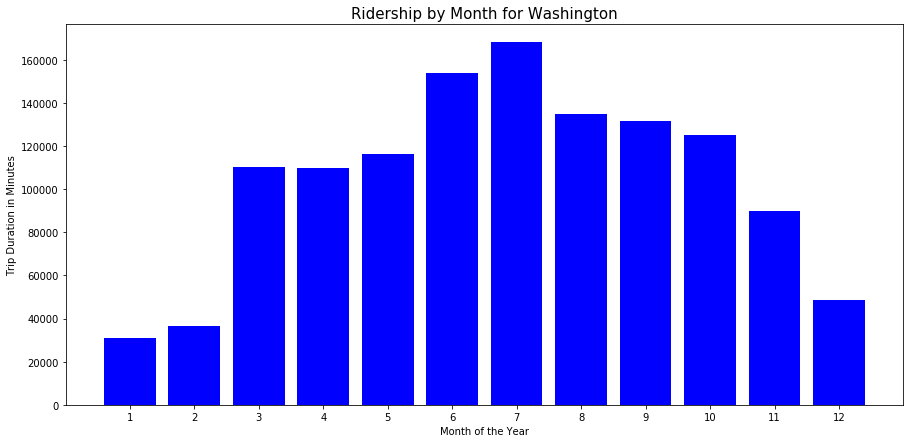

In [36]:
# How does ridership differ by month or season? Which month / season has the highest ridership?
def duration_by_month(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initialize the dict to hold trip duration by month
        dur_month = {1:0, 2:0, 3:0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
        
        # Get the trip duration by month
        for row in reader:
            dur_month[int(row['month'])] += float(row['duration'])
                
        return (dur_month)


dur_by_month_Washington = duration_by_month(data_file_Washington)
print("Ridership by Month for Washington => "+ str(dur_by_month_Washington))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, dur_by_month_Washington.values(), color='b', align='center')
plt.xticks(no_of_months, dur_by_month_Washington.keys())
plt.xlabel("Month of the Year")
plt.ylabel("Trip Duration in Minutes")
plt.title("Ridership by Month for Washington", fontsize=15)
plt.show()

Subscriber Trips by Month => {1: 2212, 2: 2571, 3: 4383, 4: 4410, 5: 4520, 6: 5613, 7: 5155, 8: 5392, 9: 5204, 10: 5232, 11: 4139, 12: 2922}
Customer Trips by Month => {1: 222, 2: 283, 3: 1188, 4: 1192, 5: 1248, 6: 1707, 7: 2186, 8: 1806, 9: 1674, 10: 1560, 11: 1075, 12: 432}


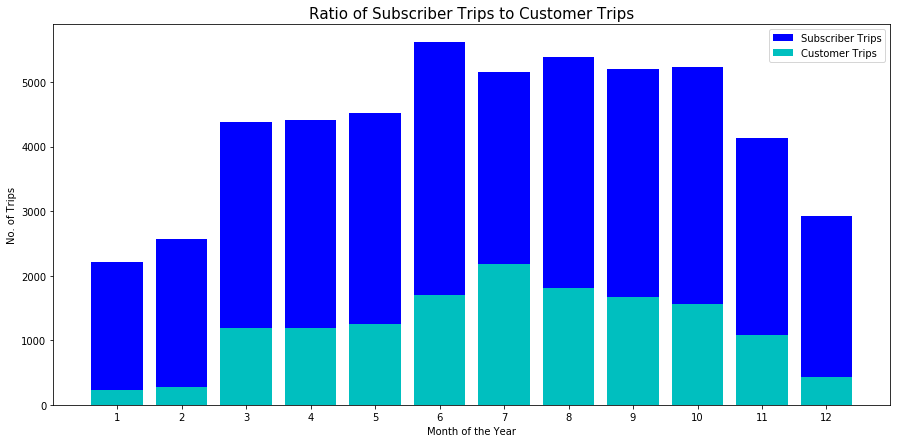

Ratio of Subscriber to Customer Trips => {1: 9.96, 2: 9.08, 3: 3.69, 4: 3.7, 5: 3.62, 6: 3.29, 7: 2.36, 8: 2.99, 9: 3.11, 10: 3.35, 11: 3.85, 12: 6.76}


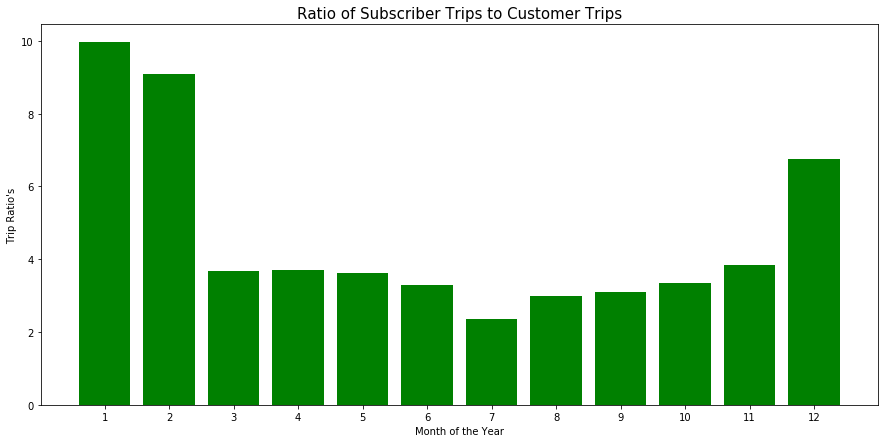

In [37]:
# Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
def trips_by_month(filename, user_type):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # Initialize the dict to hold trips by month
        trips_month = {1:0, 2:0, 3:0, 4: 0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
        
        # Get the trips for each month for different users
        for row in reader:
            if user_type == 'Subscriber' and row['user_type'] == 'Subscriber':
                trips_month[int(row['month'])] += 1
            elif user_type == 'Customer' and row['user_type'] == 'Customer':
                trips_month[int(row['month'])] += 1
                
        return (trips_month)


trips_month_subs = trips_by_month(data_file_Washington, 'Subscriber')
print("Subscriber Trips by Month => " + str(trips_month_subs))

trips_month_cust = trips_by_month(data_file_Washington, 'Customer')
print("Customer Trips by Month => " + str(trips_month_cust))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, trips_month_subs.values(), color='b', align='center')
plt.bar(no_of_months, trips_month_cust.values(), color='c', align='center')
plt.legend(('Subscriber Trips','Customer Trips'))
plt.xticks(no_of_months, trips_month_subs.keys())
plt.xlabel("Month of the Year")
plt.ylabel("No. of Trips")
plt.title("Ratio of Subscriber Trips to Customer Trips", fontsize=15)
plt.show()

# Get the Ratio of Subscriber Trips to Customer Trips
ratio_of_trips = {mon: round(trips_month_subs[mon]/trips_month_cust[mon],2) for mon in trips_month_subs}
print("Ratio of Subscriber to Customer Trips => " + str(ratio_of_trips))

no_of_months = range(12)
plt.figure(figsize=(15,7))
plt.bar(no_of_months, ratio_of_trips.values(), color='g', align='center')
plt.xticks(no_of_months, ratio_of_trips.keys())
plt.xlabel('Month of the Year')
plt.ylabel("Trip Ratio's")
plt.title("Ratio of Subscriber Trips to Customer Trips", fontsize=15)
plt.show()

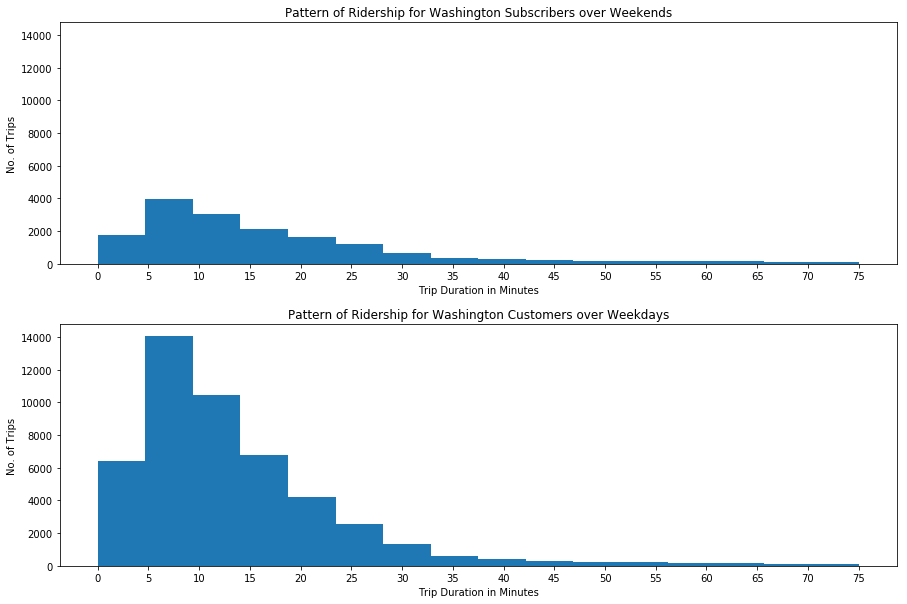

In [38]:
# Is the pattern of ridership different on the weekends versus weekdays?
def trips_by_day_of_week(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        weekend_duration = []
        weekend_no_of_rides = 0
        
        weekday_duration = []
        weekday_no_of_rides = 0
        
        # Get the trip count and duration for weekends and weekdays.
        for row in reader:
            if row['day_of_week'] == 'Saturday' or row['day_of_week'] == 'Sunday':
                weekend_duration.append(float(row['duration']))
                weekend_no_of_rides += 1
            else:
                weekday_duration.append(float(row['duration']))
                weekday_no_of_rides += 1
            
        return (weekend_duration, weekend_no_of_rides, weekday_duration, weekday_no_of_rides)

weekend_duration, weekend_no_of_rides, weekday_duration, weekday_no_of_rides = trips_by_day_of_week(data_file_Washington)

# Plot the histograms
f, (plt1, plt2) = plt.subplots(2, sharey=True)
plt1.hist(weekend_duration, range = (0, 75), bins = 16)
plt1.set_title('Pattern of Ridership for Washington Subscribers over Weekends')
plt1.set_xlabel('Trip Duration in Minutes')
plt1.set_ylabel("No. of Trips")
plt1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))

plt2.hist(weekday_duration, range = (0, 75), bins = 16)
plt2.set_title('Pattern of Ridership for Washington Customers over Weekdays')
plt2.set_xlabel('Trip Duration in Minutes')
plt2.set_ylabel("No. of Trips")
plt2.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))

f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()

Subscriber Trips by Day of Week => {1: 7658, 2: 8322, 3: 8520, 4: 8454, 5: 7958, 6: 5589, 7: 5252}
Customer Trips by Day of Week => {1: 1736, 2: 1426, 3: 1583, 4: 1530, 5: 2012, 6: 3311, 7: 2975}


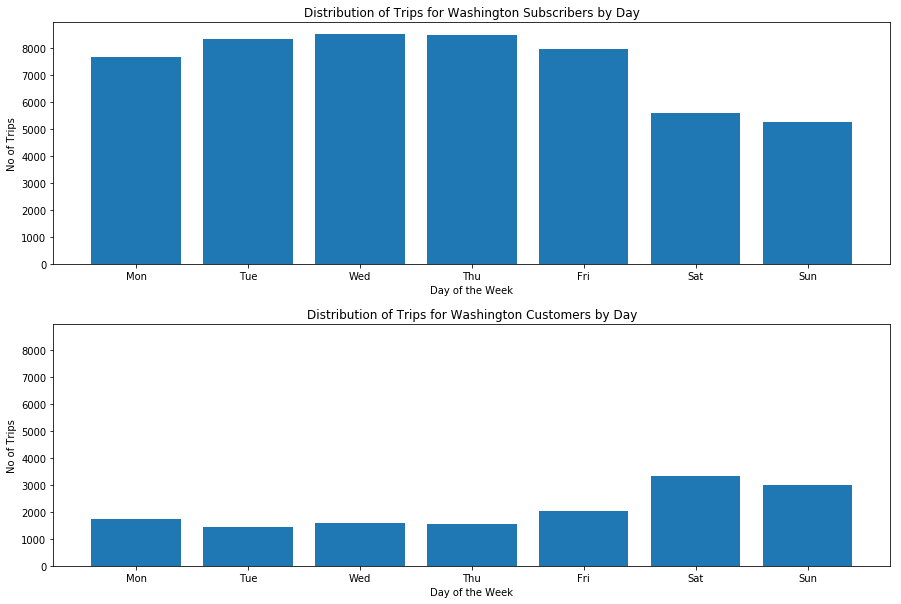

In [39]:
# On what days are Subscribers most likely to use the system? What about Customers?
# Does the average duration of rides change depending on the day of the week?
def trips_by_day(filename, user_type):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize the variables
        days_of_week = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
        trips_day_of_week = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
        
        # Get the trip count for Subscribers and Customers for each day of the week
        for row in reader:
            if user_type == 'Subscriber' and row['user_type'] == 'Subscriber':
                trips_day_of_week[days_of_week[row['day_of_week']]] += 1
            elif user_type == 'Customer' and row['user_type'] == 'Customer':
                trips_day_of_week[days_of_week[row['day_of_week']]] += 1
                
        return (trips_day_of_week)

day_of_weeks_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

trips_day_of_week_subs = trips_by_day(data_file_Washington, 'Subscriber')
print("Subscriber Trips by Day of Week => " + str(trips_day_of_week_subs))

trips_day_of_week_cust = trips_by_day(data_file_Washington, 'Customer')
print("Customer Trips by Day of Week => " + str(trips_day_of_week_cust))

# Plot the bar chart for Washington Subscribers
f, (plt1, plt2) = plt.subplots(2, sharey=True)
plt1.bar(list(trips_day_of_week_subs.keys()), trips_day_of_week_subs.values())
plt1.set_xticks(list(trips_day_of_week_subs.keys()))
plt1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt1.set_xlabel("Day of the Week")
plt1.set_ylabel('No of Trips')
plt1.set_title('Distribution of Trips for Washington Subscribers by Day')

# Plot the bar chart for Washington Customers
plt2.bar(list(trips_day_of_week_cust.keys()), trips_day_of_week_cust.values())
plt2.set_xticks(list(trips_day_of_week_cust.keys()))
plt2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt2.set_xlabel("Day of the Week")
plt2.set_ylabel('No of Trips')
plt2.set_title('Distribution of Trips for Washington Customers by Day')

f.subplots_adjust(hspace=0.25)
f.set_figheight(10)
f.set_figwidth(15)
plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I'll be interested to apply the techniques of data science on online employers in Udacity. 

Where are they from? 

Which are the most countries/cities that online employers in Udacity work from?

What are their qualifications?

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])